# Library Python yang digunakan

1.   Pandas
2. matplotlib
3. sastrawi
4. wordcloud menggambarkan metadata kumpulan kunci atau keywords pada sebuah dokumen. alternatof lain : tweepy, TextBlob, Pandas, Re(regex),Time serta Matplotlib.
5. numpy melakukan operasi komputasi untuk tipe data numerik seperto tope data operasi aritmatika atau operasi lainnya yang bisa diterapkan pada vektor atau matriks
6. sklearn:
- naive bayes ( GaussianNB )
- model selection ( RepeatedStratifiedKFold, GridSearchCV, StratifiedKFlod)
- metrics ( confusion_matrix, calssification_report )





In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import WordCloud
import numpy as np

## Crawling Data

In [ ]:
df = pd.read_csv('/content/data_real.csv',index_col=0)
df.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,Pengiriman dan respon super cepat. Tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"Php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [ ]:
df_copy = df.copy()

##Labeling

In [ ]:
label = []
for index, row in df_copy.iterrows():
  if row["Rating"]== 1 or row["Rating"]== 2:
    label.append(0)
  else:
    label.append(1)

df_copy["label"]= label

In [ ]:
df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,Pengiriman dan respon super cepat. Tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"Php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


## Processing Teks

normalisasi

In [ ]:
df_copy['Ulasan'] = df_copy['Ulasan'].str.lower()


In [ ]:
norm = {" dgn " : " dengan ", " gue ": " saya ", " dgn ":" dengan ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ', 'recomend':' rekomen ', 'good':' bagus '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: normalisasi(x))


In [ ]:
df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan tidak sesuai dengan yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman dan respon super cepat. tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


stopwords

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text


df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: stopword(x))
df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan sesuai yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


tokenize

In [ ]:
tokenized = df_copy['Ulasan'].apply(lambda x:x.split())
tokenized

,Ulasan
0,"[pesanan, sesuai, yg, d, gambar]"
1,"[pengiriman, respon, super, cepat., tpi, baran..."
2,"[barang, yg, dikirim, sesuai, pesanan]"
3,"[php,, bilang, isi, diseskripsi, pas, dipesen,..."
4,"[barang, jelek, copot&#34;, terus, tmpat, taro..."
...,...
995,"[bagus, memuaskan., packing, bagus, cepat]"
996,"[mantap, pengiriman, cepat, rekomen, ed]"
997,"[pengiriman, cepat., lumayan]"
998,"[belom, dicoba, semoga, oke, barangnya]"


##Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Ulasan):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in Ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('databersih2.csv', index=False)
data_clean = pd.read_csv('databersih2.csv', encoding='latin1')
data_clean.head()

p e s a n  s e s u a i  y g  d  g a m b a r
k i r i m  r e s p o n  s u p e r  c e p a t  t p i  b a r a n g  s e s u a i  g a m b a r  t i d a k  k u a t  t e m b u s  j o k  m o t o r
b a r a n g  y g  k i r i m  s e s u a i  p e s a n
p h p  b i l a n g  i s i  s k r i p s i  p a s  s e n  b e d a  m u b a j i r  r p 5 0  0 0 0  n y a t a  i s i  g a  c o c o k
b a r a n g  j e l e k  c o p o t  3 4  t e r u s  t m p a t  t a r o  i s i
b e l i  s t a p l e s  g a k  j u a l  i s i  s e k a l i  p a k e  c k c k c k
b a i k  k a l a u  m a u  n g i r i m  b a r a n g  p e r i k s a  d u l u  g a n  k o n d i s i  b a r a n g  l a y a k  a p a  g a k  g i t u  l o h  i s i  k a r a t  s e m u a
p r o d u k  s e s u a i  o r d e r  p r o h e x  y g  k i r i m
b a r a n g  s d h  t e r i m a
b i s a  b u a t  m a s a n g  j o k  g a k  p a k e
b a r a n g  d a t a n g  c a c a t  g a k  g u n a  h a r u s  s b l u m  k i r i m  d i  c o b a  d u l u
k e c e w a  b a r u  d i p a k e y 

,Ulasan
0,p e s a n s e s u a i y g d g a m b a r
1,k i r i m r e s p o n s u p e r c e p a t ...
2,b a r a n g y g k i r i m s e s u a i p e ...
3,p h p b i l a n g i s i s k r i p s i p a ...
4,b a r a n g j e l e k c o p o t 3 4 t e r ...


menggabungkan kedua atribut

In [ ]:
at1 = pd.read_csv('databersih2.csv')
at2 = pd.read_csv('data_real.csv')
att2 = at2['label']

result = pd.concat([at1, att2], axis=1)

In [ ]:
result.head()

,Ulasan,label
0,pesan sesuai yg d gambar,0
1,kirim respon super cepat tpi barang sesuai gam...,0
2,barang yg kirim sesuai pesan,0
3,php bilang isi skripsi pas sen beda mubajir rp...,0
4,barang jelek copot 34 terus tmpat taro isi,0


## Menghitung Kata dengan TF-IDF

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [24]:
Ulasan = result['Ulasan']

In [25]:
Ulasan.isnull().sum()

np.int64(6)

In [26]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [27]:
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

3


In [28]:
term_fit.vocabulary_

{'tidak': 2, 'ada': 0, 'komentar': 1}

In [29]:
ulasan_tf = Ulasan[1]
print(ulasan_tf)

k i r i m  r e s p o n  s u p e r  c e p a t  t p i  b a r a n g  s e s u a i  g a m b a r  t i d a k  k u a t  t e m b u s  j o k  m o t o r


In [30]:
term_frequency = term_fit.transform([ulasan_tf])
print(term_frequency)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 0 stored elements and shape (1, 3)>


In [31]:
dokumen = term_fit.transform(Ulasan)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)


[6.61729044 6.61729044 6.61729044]
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 3)>


## Visualisasi (NLP)

In [32]:
train_s0 = df_copy[df_copy["label"] == 0]

In [33]:
train_s0["Ulasan"] = train_s0["Ulasan"].fillna("tidak ada komentar")

<ipython-input-33-8dc3798ca55b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan"] = train_s0["Ulasan"].fillna("tidak ada komentar")


In [34]:
train_s0.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan sesuai yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [35]:
from wordcloud import WordCloud

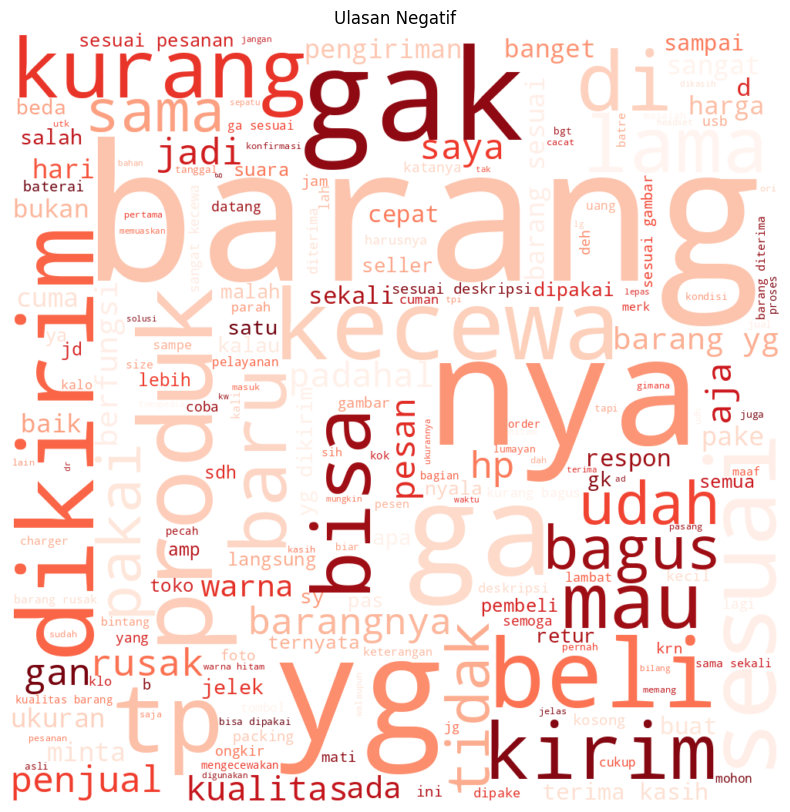

In [36]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [37]:
train_s1 = df_copy[df_copy["label"] == 1]

In [38]:
train_s1["Ulasan"] = train_s1["Ulasan"].fillna("Tidak ada komentar")

<ipython-input-38-8c39827972c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan"] = train_s1["Ulasan"].fillna("Tidak ada komentar")


In [39]:
train_s1.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,1,barang sesuai pesanan cepat,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...,1
1,2,barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,1
2,3,paket rapi...mantap....cepat....sampe tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,1
3,4,saya puas barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...,1
4,5,responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...,1


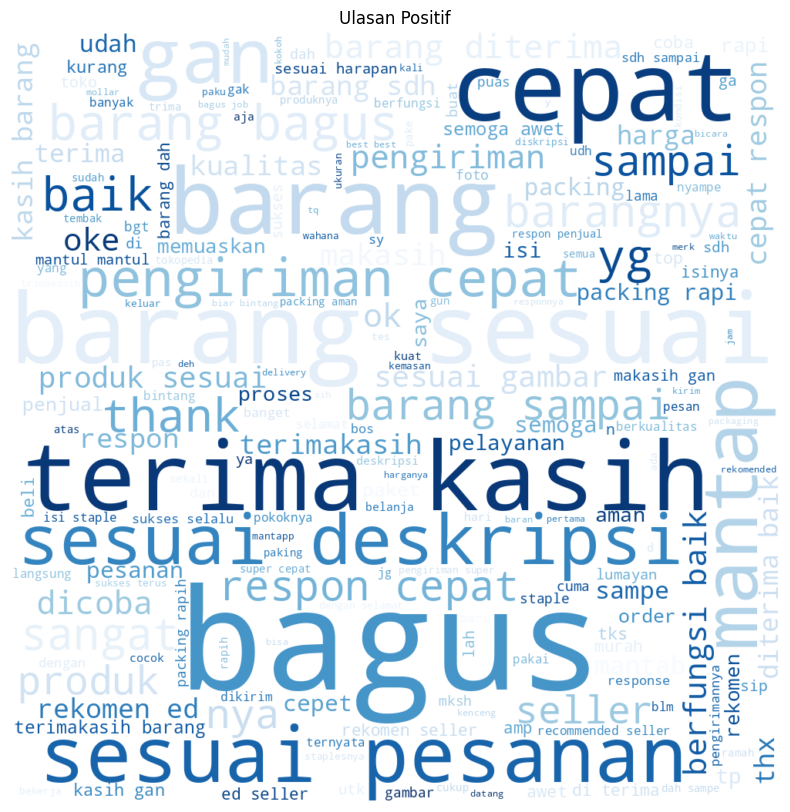

In [40]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()


<ipython-input-41-9f06c821a48c>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(df_copy["label"], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

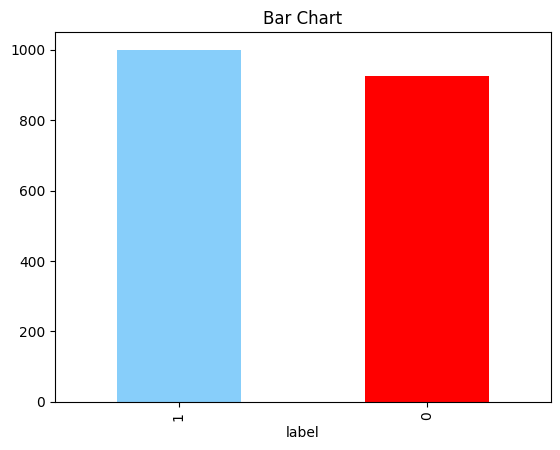

In [41]:
sentimen_data = pd.value_counts(df_copy["label"], sort=True)
sentimen_data.plot(kind='bar', color=['lightskyblue', 'red'])
plt.title("Bar Chart")
plt.show

##Split Data (TF-IDF)

In [42]:
result['Ulasan'] = result['Ulasan'].fillna("Tidak ada komentar")

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(result['Ulasan'], result['label'],
                                                    test_size=0.1, stratify=result['label'], random_state=30)


In [44]:
import numpy as np

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [46]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1732, 3)
(193, 3)


In [47]:
X_train = X_train.toarray()

In [48]:
X_test = X_test.toarray()

# Machine Learning (Naive Bayes Classifier)

In [49]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [50]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}
gscv_nb = GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv = cv_method,
                        verbose = 1,
                        scoring = 'accuracy')

gscv_nb.fit(X_train, y_train)
gscv_nb.best_params_


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': np.float64(1.0)}

In [51]:
nb = GaussianNB(var_smoothing=0.005336699231206307)

In [52]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.005336699231206307)

In [53]:
y_pred_nb = nb.predict(X_test)

# Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import RocCurveDisplay # Import RocCurveDisplay instead of plot_roc_curve

In [57]:
print('----- confusion matrix ------')
print(confusion_matrix(y_test, y_pred_nb))

print('----- classification report -----')
print(classification_report(y_test, y_pred_nb))

----- confusion matrix ------
[[ 92   1]
 [100   0]]
----- classification report -----
              precision    recall  f1-score   support

           0       0.48      0.99      0.65        93
           1       0.00      0.00      0.00       100

    accuracy                           0.48       193
   macro avg       0.24      0.49      0.32       193
weighted avg       0.23      0.48      0.31       193



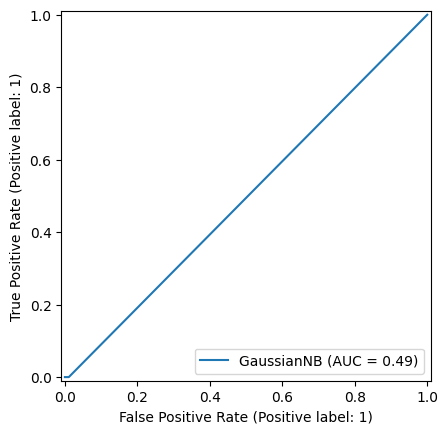

In [59]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(nb, X_test, y_test)
plt.show()